# Лабораторная работа 2. Решающие деревья и случайные леса.

ФИО: Викулин Всеволлд Александрович

Группа: 517

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### I. Решающие деревья своими руками
#### Задача 1.
В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__1__

Реализуйте следующую функцию:

In [9]:
a = np.array([1,-100,4,0,4,-1,2])
a[np.unique(a, return_index=True)[1]]

array([-100,   -1,    0,    1,    2,    4])

In [10]:

def gini(target_vector):
    first_class_num = sum(target_vector)
    first_class_prob = first_class_num / float(len(target_vector))
    zero_class_prob = 1 - first_class_prob
    return 1 - first_class_prob ** 2 - zero_class_prob ** 2

def gain_for_split(threshold, feature_vector, target_vector, start_gini):
    
    left_split = target_vector[feature_vector <= threshold]
    right_split = target_vector[feature_vector > threshold]    
    gain =  - len(left_split) / (float(len(target_vector)))  * gini(left_split)\
                      - len(right_split) / (float(len(target_vector)))  * gini(right_split)
    if threshold == 0.1:
        print "gain", gain,  left_split, right_split, target_vector
    return gain
def unique_features(feature_vector, target_vector):
    feature_dict = {}

In [83]:
def find_best_split(feature_vector, target_vector):
    sort_target = target_vector[feature_vector.argsort()]
    sort_feature = np.sort(feature_vector)
    __sort_target , uniq_index = np.unique(sort_feature[::-1], return_index=True)
    sort_feature = sort_feature[:-1]
    uniq_index = (len(feature_vector) -1 - uniq_index)[:-1]
    ones_counts = sum(sort_target)
    zeroes_counts = len(sort_target) - sum(sort_target)
    left_ones =  np.cumsum(sort_target)[uniq_index]
    left_zeroes =  np.cumsum(1 - sort_target)[uniq_index]
    right_ones =  (ones_counts -  np.cumsum(sort_target))[uniq_index]
    right_zeroes =  (zeroes_counts - np.cumsum(1 - sort_target))[uniq_index]
    sum_left = left_ones + left_zeroes
    sum_right = right_ones + right_zeroes
    gini_left = (1.0 - (left_ones/(1.0*sum_left)) ** 2 - (left_zeroes/(1.0*sum_left)) ** 2)
    gini_right =  (1.0 - (right_ones/(1.0*sum_right)) ** 2 - (right_zeroes/(1.0*sum_right)) ** 2)
    gain = -(sum_left/float(len(sort_target)) * gini_left +  sum_right/float(len(sort_target)) * gini_right)
    best_id =  np.argmax(gain)
    return  sort_feature[uniq_index], gain, sort_feature[uniq_index][best_id], gain[best_id]
feature_vector = np.array([0.1,0.1,0.1,10,0.5])
target_vector = np.array([1,0,1,0,0])
print find_best_split(feature_vector, target_vector)
#print find_best_split(feature_vector, target_vector)

(array([ 0.1,  0.5]), array([-0.26666667, -0.4       ]), 0.10000000000000001, -0.26666666666666666)


Я не понял, зачем Вы предлагаете  называть эту величину критерием Джини, хотя  это вообще говоря не критерий Джини, а кусок от Gainа. Я же буду называть то, что вы называете критерием Джиеи Gainом, потому что так правильнее

Параметры:
* feature_vector: вещественнозначный вектор значений признака (np.array)
* target_vector: вектор классов объектов (np.array). len(feature_vector)==len(target_vector).

Возвращаемые значения:
* thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на две различные подвыборки, или поддерева (np.array)
* ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds. (np.array, len(ginis)==len(thresholds))
* оптимальный порог (число)
* оптимальное значение критерия Джини (число)

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r),$$
$R$ - множество объектов, $R_l$ и $R_r$ - объекты, попавшие в левое и правое поддерево, $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ - доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

__2__
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах,а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог - значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака - класс" для всех пяти признаков.

Populating the interactive namespace from numpy and matplotlib
MAX gain for feature  STG  is  -0.453977075044  hold is  0.61
MAX gain for feature  SCG  is  -0.46501949804  hold is  0.42
MAX gain for feature  STR  is  -0.467338294455  hold is  0.36
MAX gain for feature  LPR  is  -0.454668319293  hold is  0.38
MAX gain for feature  PEG  is  -0.0860656027491  hold is  0.33


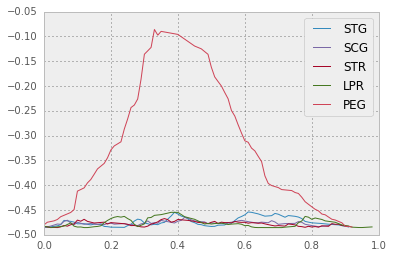

In [16]:
students = pd.read_csv("students.csv")
import matplotlib.pyplot as plt
%pylab inline
pd.set_option('display.mpl_style', 'default')
target = students[" UNS"].values
names = []
for column in students.columns:
    if column != " UNS":
        names.append(column)
        bs = find_best_split(students[column].values, target)
        threshold = bs[0]
        gain = bs[1]
        plt.plot(bs[0], bs[1])
        print "MAX gain for feature ", column, " is ",bs[-1], " hold is ", bs[-2]
plt.legend(names, loc='best', fontsize = 12)
plt.show()

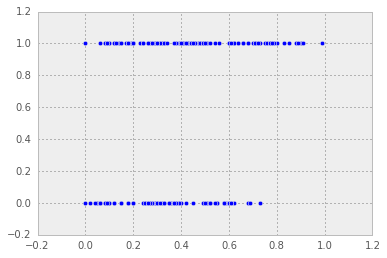

In [153]:
plt.scatter(students["STG"].values, target)
plt.show()

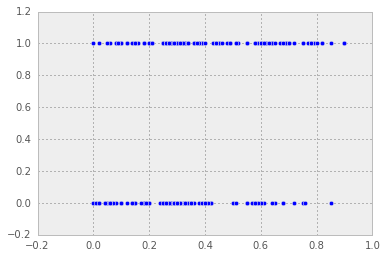

In [154]:
plt.scatter(students["SCG"].values, target)
plt.show()

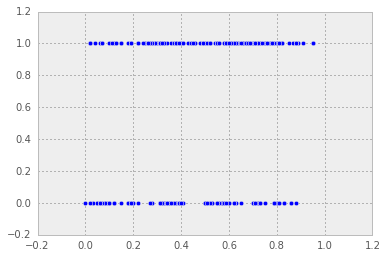

In [155]:
plt.scatter(students["STR"].values, target)
plt.show()

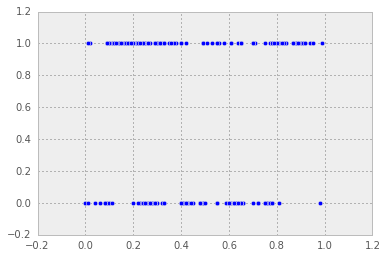

In [156]:
plt.scatter(students["LPR"].values, target)
plt.show()

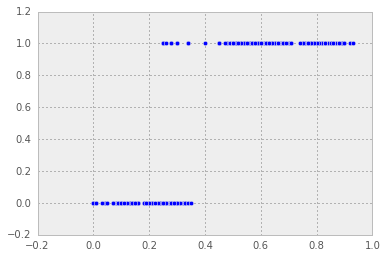

In [157]:
plt.scatter(students["PEG"].values, target)
plt.show()

__3__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Капитан подказывает, что лучшего проводить деление по признаю PEG (что бы это не значило). На графиках видно, что у других признаков нет такого четкого значения, которое позволяет разбить  на два класса адекватно. У этого признака же такое знаечние есть, где-то > 0.375 => класс 1, < 0.21 => класс 0. Критерий Джини говорит как раз тоже самое (со значением порога около 0.33), график Гейна для этого признака ОЧЕНЬ сильно лежит выше других. График гейна для хороших признаков должен выглядеть как раз примерно так: то есть в ярко выраженным максимумом, унимодальным. Кривые для плохих признаков будут размазаны по всем значениям порога, так что никакое значение не даст осущетимый выиграш в плане разбиения.

__4__

Реализуйте класс для обучения решающих деревьев. Мы не будем усложнять класс множеством параметров, как в sklearn. Требования к классу:
* Единственный параметр дерева - вектор, задающий типы признаков: если в позиции i стоит 0, то с признаком номер i нужно работать как с вещественным, если 1 - как с категориальным.
* Чтобы классификатор "распознавался" функциями sklearn, необходимо наследовать его от BaseEstimator. 
* У класса должно быть реализовано два метода: fit и predict. Метод fit принимает на вход двумерный np.array - матрицу объекты-признаки и одномерный вектор ответов y, внутри метода происходит обучение дерева. Метод predict принимает на вход двумерную матрицу объекты-признаки (np.array) и возвращает вектор предсказанных классов (одномерный np.array) для всех объектов.
* Построение дерева должно осуществляться согласно базовому жадному алгоритму. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу. Ответ в листе: класс объектов, находящихся в нем. Для категориальных признаков необходимо выполнить преобразование, описанное на [семинаре](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf) в разделе "Учет категориальных признаков".

Далее будут даны рекомендации по реализации решающего дерева. Им следовать необязательно: например, вы можете использовать свою структуру для хранения дерева.
* Дерево можно хранить в виде сложенных списков. Каждая внутренняя вершина дерева - список node длины 4: node[0] хранит индекс признака, по которому в данной вершине делается разбиение, node[1] - порог для разбиения, если i-й признак вещественный, и множество значений признака, с которыми объект попадает в левое поддерево, если i-й признак категориальный, node[2] - левое поддерево (список) и node[3] - правое поддерево (список). В листьях node состоит из единственного элемента - ответа, возвращаемого в этом листе. Пример простого дерева, разделяющего выборку по нулевому признаку по порогу 5 на два листа, возвращающих класс 0 и 1: [0, 5, [0], [1]]. Если в левом поддереве корня выполнять разделение по 1-му признаку по порогу 7: [0, 5, [1, 7, [0], [1]], [1]].
* Внутри функции fit определяется рекурсивная функция fit_node(subX, suby, node), принимающая матрицу объекты-признаки subX и ответы на этих объектах suby, а также ссылку на пустой список node - вершину, в которой необходимо выполнить разбиение на две подвыборки. Функция fit_node должна заполнить этот список вызовами node.append(.....). Если suby состоит из одинаковых значений, нужно добавить к node это значение и выйти. Иначе выполнить перебор по всем признакам: для каждого признака с помощью функции find_best_split найти наилучшее разбиение и выбрать признак, дающий максимальное значение критерия Джини. Для категориальных признаков нужно выполнить специальное преобразование (см. семинар). Вершину нужно заполнить индексом выбранного признака, порогом или множеством значений (задающих разбиение), а затем рекурсивно вызвать fit_node для левого и правого поддерева.
* Внутри функции predict также определяется рекурсивная функция predict_node(x, node), принимающая один объект и вершину. Она проверяет, является ли node листом (это можно определить по длине списка), если да - возвращает node[0], т. е. класс, задаваемый этим листом. Иначе функция определяет, к какому поддереву относится объект, и рекурсивно вызывает себя для этого поддерева.
* В процессе тестирования кода может оказаться, что рекурсивные вызовы повторяются бесконечно. Так происходит, если в одно из поддеревьев попадает пустая подвыборка. Этого быть не должно: пороги, при которых все объекты попадают в одно поддерево, не рассматриваются (см. указания к функции find_best_split).
* Дерево должно давать единичную долю верных ответов на обучающей выборке.
* Протестировать, правильно ли выполняется преобразование категориальных признаков, можно на простой синтетической выборке с одним категориальным признаком, по которому объекты идеально делятся на два класса, и при этом такого эффекта нельзя достичь установкой порога на этот признак.

In [619]:
from sklearn.base import BaseEstimator



In [ ]:
### Шаблон класса, удовлетворяющего требованиям
class DecisionTree(BaseEstimator):
    def __init__(self, types):
        self.types = types
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    def fit(self, X, y):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
    def predict(self, X):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
### Шаблон класса, следующего рекомендациям
class DecisionTree(BaseEstimator):
    def __init__(self, types):
        self._tree = []
        self.types = types

    def fit(self, X, y):
        def fit_node(subX, suby, node):
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
            
            
        fit_node(X, y, self._tree)
        
    def predict(self, X):
        def predict_node(x, node):
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
            
            
        predicted = []
        for x in X:
            predicted.append(predict_node(x, self._tree))
        return np.array(predicted)

__5__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец - это целевая переменная (e-edible, p-poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что - классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [942]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def divide(data,column,value, devide_data):
    if devide_data is not None:
        return [data[devide_data[:,column]<=value], data[devide_data[:,column]>value]]
    return [data[data[:,column]<=value], data[data[:,column]>value]]

class node:
    def __init__(self,col=None ,value=None,results=None,tb=None,fb=None, leaf_depth=None, new_feature_values=None):
        self.col=col
        self.value=value
        self.results=results
        self.tb=tb
        self.fb=fb
        self.leaf_depth=leaf_depth      
        self.new_feature_values = new_feature_values
    
class CustomTree(BaseEstimator):
    result_tree=None
    max_depth = None
    features_types = None
    
    def __init__(self, features_types, max_depth = float('inf'), min_samples=10):  
        self.max_depth=max_depth
        self.features_types = features_types
        self.min_samples = min_samples    
        
    def change_feature(self, feature, target_vector):
        unique_feature, feature_counts = np.unique(feature, return_counts=True)
        first_class_counts = [len(feature[(target_vector == 1) & (feature == i)]) for i in unique_feature]
        final_value = np.array(first_class_counts) / (1.0 * np.array(feature_counts) )
        res = list(unique_feature[np.argsort(final_value)])
        final_dict = {}
        for i in  unique_feature:
            final_dict[i] = res.index(i)
        return np.array([final_dict[x] for x in feature]), final_dict
    
    def creare_tree_node(self,rows,depth): 
        max_gain = -float("inf")
        need_to_save_changes = False
        if depth>=self.max_depth or len(rows) < self.min_samples:
            return node(results=rows[:,-1].mean(),leaf_depth=depth)
        best_criteria=None
        best_sets=None          
        target=rows[:,-1]
        if sum(target) == len(target) or sum(target) == 0:
            return node(results=target.mean(),leaf_depth=depth)
            
        start_gini = gini(target)
        new_rows = np.copy(rows)
        for column in range(0, self.features_count):
            if len(np.unique(rows[:, column])) < 2:
                continue
            if self.features_types[column] == 1:
                new_rows[:, column], new_dict = self.change_feature(feature=new_rows[:, column], target_vector=target)
            new_column = new_rows[:, column]
            features, column_gain, column_threshold, best_column_gain = find_best_split(new_column, target)
            if best_column_gain > max_gain:
                if self.features_types[column] == 1:
                    need_to_save_changes = True
                    feature_map = new_dict
                else: 
                    need_to_save_changes = False
                    
                max_gain = best_column_gain
                best_column = column
                best_threshold = column_threshold
        if start_gini + max_gain > 0:
            best_sets=divide(data=rows, devide_data=new_rows, column=best_column, value=best_threshold) 
            trueBranch=self.creare_tree_node(best_sets[0], depth+1)
            falseBranch=self.creare_tree_node(best_sets[1], depth+1)
            
            if need_to_save_changes:
                return node(col=best_column,value=best_threshold, \
                        tb=trueBranch, fb=falseBranch, leaf_depth=depth, new_feature_values=feature_map)
            else:
                return node(col=best_column,value=best_threshold, \
                        tb=trueBranch, fb=falseBranch, leaf_depth=depth)
                
        else:
            return node(results=target.mean(), leaf_depth=depth)
        
    def fit(self,X_train,y_train):
        rows=numpy.concatenate((X_train, numpy.array([y_train]).T), axis=1)
        self.features_count = X_train.shape[1]
        self.result_tree=self.creare_tree_node(rows,0)
        
    def predict_one_observation(self, tree, observation, err):
        if tree.results!=None:
            return (int)(tree.results >= 0.5)
        else:
            v=observation[tree.col]
            if tree.new_feature_values is not None:
                if v in tree.new_feature_values:
                    v = tree.new_feature_values[v]                
                else:
                    return self.predict_one_observation(tree.tb,observation, err + 1)
            branch=None
            if v<=tree.value: 
                branch=tree.tb
            else: 
                branch=tree.fb
        return self.predict_one_observation(branch,observation, err + 1)
    
    def predict(self,data):
        prediction_result=[]
        for i in xrange(0,data.shape[0]):
            prediction_result.append(self.predict_one_observation(self.result_tree,data[i,:], 0))
        return numpy.array(prediction_result)
    

In [927]:
from sklearn.cross_validation import train_test_split
tic_tac = pd.read_csv("nursery.csv").values
X = tic_tac[:, :-1]
yy = tic_tac[:,-1]
y = []
for i in yy:
    if 'not_recom' in i or 'recom' in i:
        y.append(0)
    elif 'very_recom' in i or  'priority' in i or  'spec_prior' in i:
        y.append(1)
    else:
        print i
y = np.array(y)

for col in range (0, X.shape[1]):
    le = preprocessing.LabelEncoder()
    X[:,col] = le.fit_transform(X[:,col])
print X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=42)

(12959, 8) (12959,)


In [937]:
from sklearn.preprocessing import  OneHotEncoder
enc = OneHotEncoder()
one_hot_X = enc.fit_transform(X).toarray()
print one_hot_X.shape

(12959, 27)


In [941]:
from sklearn.cross_validation import StratifiedKFold
kf = StratifiedKFold(y=y, n_folds=10)
a = []
b = []

for train_index, test_index in kf:
    X_train, X_test = one_hot_X[train_index], one_hot_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    new_tree = CustomTree([0] * one_hot_X.shape[1])
    clf = DecisionTreeClassifier()
    new_tree.fit(X_train, y_train)
    clf.fit(X_train, list(y_train))
    a.append(accuracy_score(list(y_test), new_tree.predict(X_test)))
    b.append(accuracy_score(list(y_test), clf.predict(X_test)))
a = np.mean(a)
b = np.mean(b)

In [940]:
result = {"alg" : [], "mushrooms" : [], "tic_tac" : [], "cars" : [], "nurcery" : []}
result['alg'].append('CustomTree, real features')
result['alg'].append('CustomTree, categor features')
result['alg'].append('CustomTree, one hot, real')
result['alg'].append('Sklearn')
result['mushrooms'].append(0.9992)
result['mushrooms'].append(1.0)
result['mushrooms'].append(0.9996)
result['mushrooms'].append(0.96)
result['tic_tac'].append(0.735)
result['tic_tac'].append(0.79)
result['tic_tac'].append(0.81)
result['tic_tac'].append(0.725)
result['cars'].append(0.936)
result['cars'].append(0.922)
result['cars'].append(0.922)
result['cars'].append(0.91)
result['nurcery'].append(0.9705)
result['nurcery'].append(0.974)
result['nurcery'].append(0.945)
result['nurcery'].append(0.971)
pd.DataFrame(result)

,alg,cars,mushrooms,nurcery,tic_tac
0,"CustomTree, real features",0.936,0.9992,0.9705,0.735
1,"CustomTree, categor features",0.922,1.0000,0.9740,0.790
2,"CustomTree, one hot, real",0.922,0.9996,0.9450,0.810
3,Sklearn,0.910,0.9600,0.9710,0.725


__6__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nurcery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recom - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам - наборы данных, по столбцам - алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scorer=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

Здесь я напишу все свои мысли по поводу этого задания. Это это очень плохо задавать такие вопросы и ставить тактие эксперименты. Данныъ очень мало, алгоритм, который тестируется очень склонен к переобучению. Одним варьированием параметра глубина, можно улучшить результат процентов на 15 20. Радует, что мое дерево примерно такое же склерновское. В этих числах рандома больше чем зравого смысла, каких-то глобальных вывовод делать не стоит.

Да, есть компонента случайности. Мы рандомно шафлим. Но даже если радномно пошафлили, все равно можно например случайно выдавать класс, если в узел попало одинаковое число объекта из трейна. От случайности не уйти и лучше ее не трогать.

Я кстати был сильно удивлен, казалось, что такая обработка категориальных признаков сделает все только хуже. Оказалось, что нет, иногда ставноится лучше, но, как я говорил раньше, эти изменения носят более случайный характер, так как глубина дерева все эти изменения легко бьет. Большой минус вот этого вашего метода - нужно хранить метаифнормацию о том, какие знаечния категориальных признаков находятся в узле. При БИГДАТЕ это сильно загрузит Ваши леса.

Ну еще пору слов про OneHot. НИ РАЗУ в моей маленькой практике датамайнера она мне не помогла, НИ РАЗУ. Потому что, наверное, я юзаю бустинг почти всегда, если данных немного. А если вы юзаете дерево, да еще с небольшой глубиной и даете ей на выбор 100500 фичей, каждая из которой может отделить только 0.000001 процент выборки, то это отстой. Юзайте OneHot на линейных алгоритмах, например. Ну или на глубоких деревьях (ха-ха).



__7__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

(・・ ) ?


### II. Композиции деревьев
#### Задача 2. Сравнение композиционных методов над решающими деревьями
__8 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [1006]:
data = pd.read_csv("winequality-red.csv", sep=';').values
X = data[:, :-1]
y  = data[:, -1]
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import cross_val_score
clf = DecisionTreeClassifier()
scores_dt = cross_val_score(clf, X, y, cv=5)
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
scores_bc = cross_val_score(clf, X, y, cv=5)
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_features=0.5)
scores_bc2 = cross_val_score(clf, X, y, cv=5)
clf = RandomForestClassifier(n_estimators=100, max_features=0.65)
scores_rf = cross_val_score(clf, X, y, cv=5)
clf = RandomForestClassifier(n_estimators=100)
scores_rf2 = cross_val_score(clf, X, y, cv=5)
print scores_dt.mean()
print scores_bc.mean()
print scores_bc2.mean()
print scores_rf.mean()
print scores_rf2.mean()

0.475912450174
0.560415334749
0.564839429261
0.556612311491
0.562987905109


Тоже непонятное упражнение. Дайте мне помзменять параметр max_features и весь топ изменится в любую сторону.  Я еще не понял, чем рандом форест "сложнее" беггинга + RSM, когда я его делал я делал только так и сравнивал со склерном. Ну он был вполне на склерновском уровне.

#### Задача 3. Число деревьев в случайном лесе и в градиентном бустинге
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__9__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 10, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $10 + 20 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [76]:
from sklearn.cross_validation import  train_test_split
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("winequality-red.csv", sep=';').values
X = data[:, :-1]
y  = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [77]:
errors = []
all_sizes = range(1010, 5010, 10)
for size in all_sizes:
    clf =  RandomForestClassifier(n_estimators=size, n_jobs = 4)
    clf.fit(X_train, y_train)
    errors.append(accuracy_score(y_test, clf.predict(X_test)))
   
        

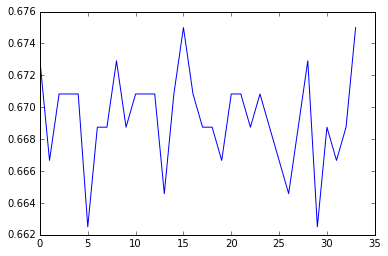

In [81]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.show()

Нет, он не переобучается. Для этого не нужно было ничего строить, а просто подумать над самим алгоритмом. Однако в таком масштабе кажется, что ошибка колеблется. Колеблется она совсем незначительно,потому что шаг очень маленький, так что в кагле всегда пишет n_estimators = 100500.

Здесь вы можете поделиться мыслями о задании.

Вам не нравятся мои видосики, больше я ничего отправлять не буду :(((((((

((((((((((((((((((((((

А здесь — вставить нарисованную вами смешную картинку.